In [12]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [14]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [15]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [16]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market = StandardScaler().fit_transform(df_market_data)


In [17]:
# Create a DataFrame with the scaled data
scaled_market_df = pd.DataFrame(scaled_market, columns=df_market_data.columns)

# Copy the crypto names from the original data
scaled_market_df["coin_id"] = df_market_data.index

# Set the coinid column as index
scaled_market_df = scaled_market_df.set_index("coin_id")


# Display sample data
scaled_market_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [18]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))


In [21]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # 创建 KMeans 模型
    kmeans = KMeans(n_clusters=i, random_state=10,n_init=10)
    kmeans.fit(scaled_market_df)
    inertia_values.append(kmeans.inertia_)

In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': k,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


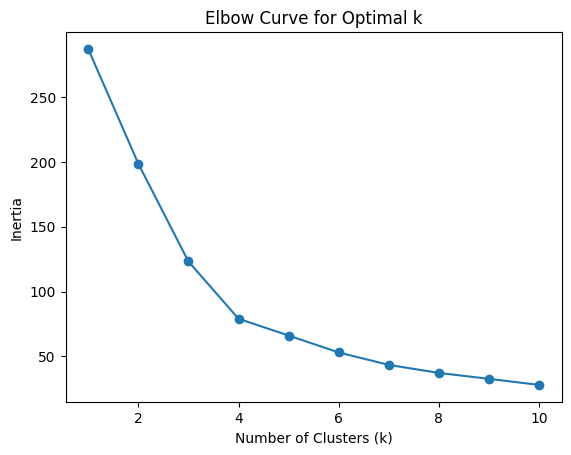

In [75]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [36]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4,n_init=10)

In [37]:
# Fit the K-Means model using the scaled data
model.fit(scaled_market_df,10)


KMeans(n_clusters=4, n_init=10)

In [38]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_clusters = model.predict(scaled_market_df)


# Print the resulting array of cluster values.
print(market_clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [39]:
# Create a copy of the DataFrame
market_predictions_df = scaled_market_df.copy()


In [40]:
# Add a new column to the DataFrame with the predicted clusters
market_predictions_df['Predicted_Clusters'] =market_clusters


# Display sample data
market_predictions_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [41]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
market_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Predicted_Clusters"
)

:NdOverlay   [Predicted_Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [48]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)


In [49]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca =pca.fit_transform(market_predictions_df)

# View the first five rows of the DataFrame. 
market_pca[0:5]


array([[ 2.03409288, -0.64157137, -0.35762863],
       [ 1.99450168, -0.49054937, -0.91224962],
       [-1.06854412, -0.41720452,  0.5963108 ],
       [-1.04091865, -0.45523427,  0.4678008 ],
       [ 3.30276384, -1.24245766, -0.217276  ]])

In [50]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca_components = pca.explained_variance_ratio_
print(sum(pca_components))

0.8900449398681148


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89

In [53]:
# Create a new DataFrame with the PCA data.
market_data_pca_df = pd.DataFrame(market_pca, columns=["PCA1", "PCA2", "PCA3"])

# Creating a DataFrame with the PCA data
crypto_names = df_market_data.index.tolist()

# Copy the crypto names from the original data
market_data_pca_df["crypto_id"] = crypto_names

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index("crypto_id")


# Display sample data
market_data_pca_df.head()


,PCA1,PCA2,PCA3
crypto_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276


---

### Find the Best Value for k Using the PCA Data

In [54]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [56]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i,n_init=10)
    k_model.fit(market_data_pca_df)
    inertia2.append(k_model.inertia_) 


In [57]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k, "inertia": inertia2}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data2)


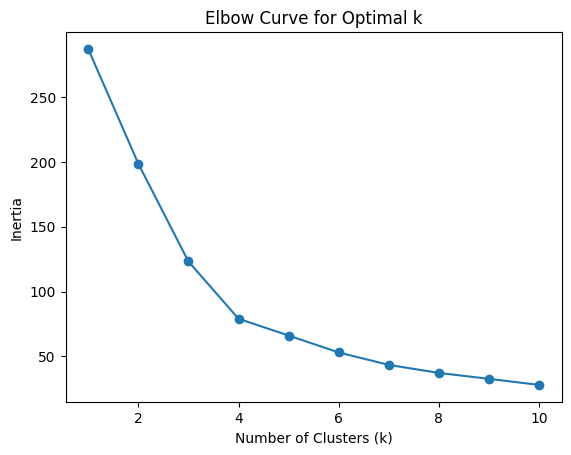

In [59]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca = elbow_pca_df.hvplot.line(x="k",y="inertia",title="Elbow Curve (PCA)", xticks=k)
elbow_pca
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  This k-value corresponds to the original data values.


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [65]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4,n_init=10)


In [66]:
# Fit the K-Means model using the PCA data
model_pca.fit(market_data_pca_df)


KMeans(n_clusters=4, n_init=10)

In [67]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predictions = model_pca.predict(market_data_pca_df)

# Print the resulting array of cluster values.
print(pca_predictions)


[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [68]:
# Create a copy of the DataFrame with the PCA data

market_data_pca_df_copy = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_df_copy["pca_segments"] = pca_predictions


# Display sample data
market_data_pca_df_copy.head()


,PCA1,PCA2,PCA3,pca_segments
crypto_id,,,,
bitcoin,2.034093,-0.641571,-0.357629,1
ethereum,1.994502,-0.490549,-0.912250,1
tether,-1.068544,-0.417205,0.596311,0
ripple,-1.040919,-0.455234,0.467801,0
bitcoin-cash,3.302764,-1.242458,-0.217276,1


In [69]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_scatter = market_data_pca_df_copy.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    hover_cols="crypto_id", 
    by="pca_segments")

pca_scatter


:NdOverlay   [pca_segments]
   :Scatter   [PCA1]   (PCA2,crypto_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [76]:
# Composite plot to contrast the Elbow curves
elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)+ elbow_plot_pca

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['k', 'inertia']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [78]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
market_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Predicted_Clusters"
)+ market_data_pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Predicted_Clusters")

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Predicted_Clusters', 'PC1', 'PC2']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 